## Binomial Distribiution
The binomial distribution
Let's list the conditions that need to hold for a random variable to have a binomial distribution:
A finite, fixed number of trials (n) are conducted
Every trial is a simple binomial experiment experiment with exactly two outcomes
The trials are independent of each other
The probability of success (p) is the same for all n trials
Let’s look at a few examples for different values of n and p. We'll put the probability of a particular outcome on the vertical axis and possible numbers of successes on the horizontal axis. We've already seen that the latter can range from 0 to n (so there are n+1 total alternatives).
When the probability of success is equal to that of failure (i.e., both are 50%), we'll get a symmetrical distribution.
For n = 5 and p = 0.5:

In [ ]:
from matplotlib import pyplot as plt
from math import factorial

n = 25
p = 0.5

distr = []

for k in range(0,n+1):
    choose = factorial(n)/(factorial(k) * factorial(n-k))
    prob = choose * p**k * (1-p)**(n-k) 
    distr.append(prob)
    
plt.bar(range(0,n+1), distr) 

### Example: 
Your company is organizing an important event. The PR team is looking for at least six media partners to provide publicity for it. Going by experience, about one in five media outlets that they negotiate with will say yes. Create a probability distribution and histogram for the random variable “number of media representatives who say yes” if you begin negotiations with 30 outlets.

<BarContainer object of 31 artists>

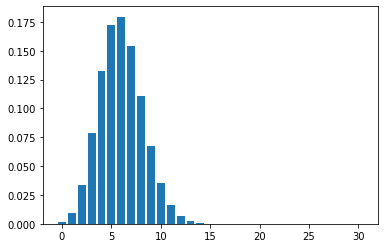

In [4]:
from matplotlib import pyplot as plt
from math import factorial

p =   1/5# add your code here: what is the probability of drawing up a contract?
n =   30 # add your code here: how many companies will we negotiate with?

distr = [] # add your code here: create a variable for the distribution value

for k in range(0 , n + 1):
       # add your code here: generate the probability distribution
    choose = factorial(n)/(factorial(k) * factorial(n-k))
    prob = choose * p**k * (1-p)**(n-k) 
    distr.append(prob)
# add your code here: create a histogram of the probability distribution
plt.bar(range(0, n+1), distr)

Getting 6 is the most likely probability, however, getting less than 6 is still around a 50% chance. Lets try something with a better confidence level of success, like 60, next time.

## Normal Distribution
The normal distribution differs from a binomial distribution in that it is continuous, and thus helps us describe the distribution of continuous random variables. (Discrete random variables can also be described with the normal distribution, but in such cases, it is an approximation.)
A normal distribution has two key parameters: mean and variance (standard deviation squared).
X ∼ (μ, σ^2)
This notation can be read as: the variable X is normally distributed with a mean of mu (μ) and a variance of sigma squared (σ²), i.e. a standard deviation of sigma.
Often, the distribution parameters are known, and you need to find the probability of a value occurring in a given interval.

Python can make the calculations for us. For this we need methods from the scipy.stats package: norm.cdf() and norm.ppf().
norm — normal continuous random variable
cdf — cumulative distribution function
ppf — percent-point function

### Example
The number of monthly visitors to an online store has a normal distribution with a mean of 100,500 and a standard deviation of 3,500.
Find the probability that in the next week the outlet website will have:
More than 111,000 visitors (in this case the marketing team will get a bonus)
Fewer than 92,000 visitors (in this case the marketing team will be penalized)

In [5]:
from scipy import stats as st

mu = 100500 # place your code here: what is the distribution's mean?
sigma = 3500 # place your code here: what is the distribution's standard deviation?

bonus_threshold = 111000 # place your code here: where does the threshold for the bonus lie?
penalty_threshold = 92000 # place your code here: where does the threshold for the penalty lie?

distr = st.norm(mu, sigma)

p_bonus = 1- distr.cdf(bonus_threshold) # place your code here: calculate the probability of achieving the bonus
p_penalty = distr.cdf(penalty_threshold) # place your code here: calculate the probability of achieving the penalty

print('Bonus probability:', p_bonus)
print('Penalty probability:', p_penalty)

Bonus probability: 0.0013498980316301035
Penalty probability: 0.0075792194387197245


### Example 2
A different online store, Fancy Pants, sells gift products to a very narrow audience of corporate clients. The store's weekly sales of premium chess sets made from mammoth tusk have a normal distribution with a mean of 420 and a standard deviation of 65.
The inventory team is deciding how many sets to order. They want the chance of selling all of them next week to be 90%. How many should they order?


In [6]:
from scipy import stats as st

mu = 420# place your code here: what is the distribution's mean?
sigma = 65# place your code here: what is the distribution's standard deviation?
prob = .9 # place your code here: what is the required probability of selling all the products?

n_shipment = st.norm(mu, sigma).ppf(1- prob) # place your code here: how many items should be ordered?

print('Need to order items:', int(n_shipment))

Need to order items: 336


## Normal Approximation to the Binomial Distribution
If the number of trials is high enough, the binomial distribution can be modeled by the normal distribution. In this lesson, we'll show you how this works.
First, some basics. For the binomial distribution, given n trials and a probability of success of p:
The expected value (mean) is n ⋅ p
The variance is n ⋅ p ⋅ (1 - p)
Remember that the expected value is the value that the mean result will approach if the experiment is repeated many times. A binomial experiment consists of n trials of a simple (Bernoulli) experiment with two outcomes.
Example of expected value
A software engineers writes 50 chunks of code every day. Every fifth time, the chunk runs perfectly the first time (p = 0.2).
This means that every day Archie is running a binomial experiment with an expected value of 50 ⋅ 0.2 = 10 and a variance of 50 ⋅ 0.2 ⋅ 0.8 = 8 (i.e., with a standard deviation of √8 = 2√2).
This doesn't mean he writes 10 perfect chunks of code every day! One day, he might be tired and wrote only five; on another day, he might feel great and write 15.
But over time, the average daily number will tend toward ten, and around 99% of values will fall within 10 ± 3 ⋅ 2√2. On any given day, you can expect between two and 18 chunks to work perfectly on the first try.
The normal approximation of the binomial distribution
Remember that with a high n (approximately 50 or more), the normal distribution can model the binomial. Then these binomial distribution parameters (expected value n ⋅ p and variance n ⋅ p ⋅ (1 - p)) can be taken as the mean and variance of a normal distribution, which will be fairly close to the binomial.
(Why is this useful? Because of handy, predictable features of the normal distribution like the three-sigma rule.)
Here, for example, is the binomial distribution for n = 50 and p = 0.8 

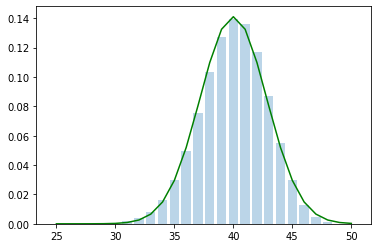

In [1]:
from matplotlib import pyplot as plt
from math import factorial
from scipy.stats import norm

# binomial distribution with n **= 50 and p = 0.8
p = 0.8
n = 50

binom = []
for k in range(0, n + 1):
    choose = float(factorial(n)) / (factorial(k) * factorial(n - k))
    prob = choose * p ** k * (1 - p) ** (n - k)
    binom.append(prob)

# normal distribution with n **= 50 and p = 0.8
mu = n * p
var = n * p * (1 - p)
sigma = var ** 0.5

x = range(0, n + 1)
norm = norm.pdf(x, mu, sigma)

plt.bar(range(25, n + 1), binom[25:], alpha=0.3)
plt.plot(range(25, n + 1), norm[25:], 'g-')
plt.show() 

While they don't coincide exactly, they're pretty close. As you increase 'n'
, they become even closer.

### Example
A company has decided to advertise online. The advertising service says that on average, 15% of users click on its ads. That's 750 visits per 5,000 views.
The company places ads, purchases 5,000 impressions (views), and gets only 715 visits. The marketing team is upset! Weren't they promised 750 visits? We'll use statistical arguments to calm them down.
To recap: when a user sees an ad, there's a 15% chance they'll click on it. This gives us a binomial distribution with n = 5000 and p = 0.15.
We'll use a normal distribution to approximate the binomial and find the probability of getting 715 clicks or fewer.
Think — we have our X axis value, and we want the probability of getting that number or less. What method do we need?
Got it?
We need norm.cdf():

In [2]:
from scipy import stats as st
import math as mt

binom_n = 5000
binom_p = 0.15

clicks = 715

mu = binom_n * binom_p
sigma = mt.sqrt(binom_n * binom_p * (1 - binom_p))

p_clicks = st.norm(mu, sigma).cdf(clicks)
print(p_clicks) 

0.08284191945650154


### Example 2:
A company sends its clients a monthly newsletter with news and offers from partners. It knows that 40% of users open the newsletter.
One partner is planning an advertising campaign and is hoping for a reach of about 9,000 users. Calculate the probability that the client’s expectations will be met if the newsletter is sent to 23,000 people.
(In the last example, we created a variable called clicks; here, create one called threshold, and save the value 9,000 to it. Let the population size be binom_n and let the probability that the newsletter gets opened be binom_p.)
Save the probability that the client's expectations will be met as p_threshold and print it.

In [3]:
from scipy import stats as st
import math as mt

threshold = 9000

binom_n = 23000
binom_p = .4
mu = binom_n * binom_p
sigma = mt.sqrt(binom_n * binom_p * (1 - binom_p))

p_threshold = 1- st.norm(mu, sigma).cdf(9000)
print(p_threshold)

0.9964477890716447
